In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1

## Part 1
## Make 10000 simulations of the arithmetic and geometric random walks from Theory 1 for T = 100 steps, and compute all empirical quantities in Theory 1. Plot the histograms. Compare with theoretical results

In [2]:
T = 100
mu = 0
scale = 1/np.sqrt(2) #for var=1
N = 10000
Sn = []
Mn = []
np.random.seed(10)
for i in range(0,N):
    Z= np.random.laplace(mu,scale,T+1) # 100 steps starting from 0
    Z[0]= 0 #S_0 - initial position zero
    S_n = np.cumsum(Z)
    Sn.append(S_n)
    Mn.append(np.exp(S_n))

In [3]:
print(np.mean(Sn, axis=0)[-1])
print(np.median(Sn,axis=0)[-1])
print(np.std(Sn, axis=0)[-1])

0.04535444592169611
-0.006378167801358914
9.982679411194056


In [4]:
print(np.mean(Mn, axis=0)[-1])
print(np.median(Mn, axis=0)[-1])
print(np.std(Mn, axis=0)[-1])

267471432458.6772
0.9936426380737612
24141980484724.37


Text(0.5, 0, 'position')

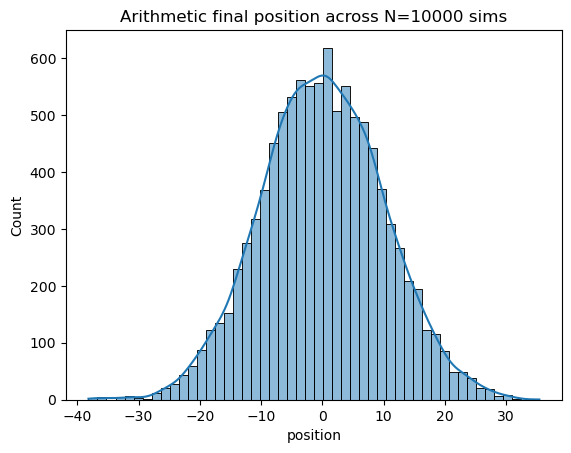

In [5]:
arithmetic_position = [Sn[i][-1] for i in range(N)]

sns.histplot(arithmetic_position, bins=50, stat='count', kde=True)
plt.title('Arithmetic final position across N=10000 sims')
plt.xlabel('position')

Text(0, 0.5, 'position')

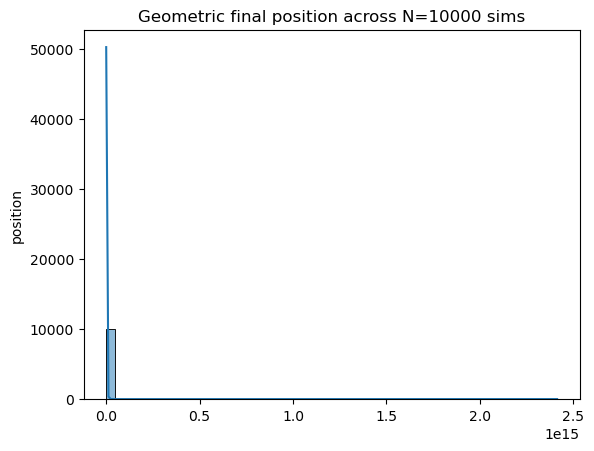

In [6]:
geometric_position = [Mn[i][-1] for i in range(N)]

sns.histplot(geometric_position, bins=50, stat='count', kde=True)
plt.title('Geometric final position across N=10000 sims')
plt.ylabel('position')

## Part 2
## Plot 5 paths for the arithmetic random walk on the same plot. Next, plot 5 paths the geometric random walk on adifferent plot, chosen as follows: rank by final value and choose paths corresponding to 10%, 30%, 50%, 70%, 90% (of initial value?)

Text(0, 0.5, 'position')

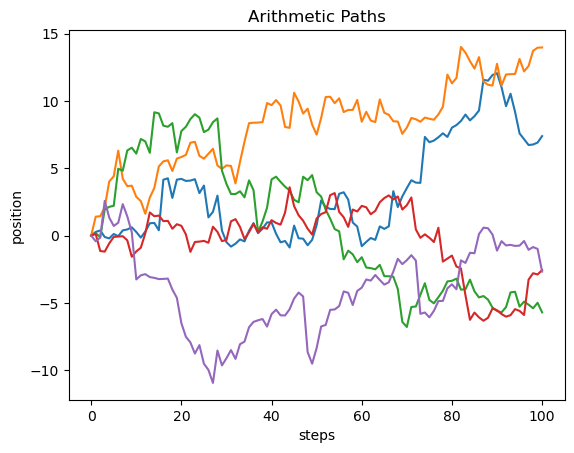

In [7]:
np.random.seed(1)
rnd_choice = np.random.choice(np.arange(N), 5)
for i in rnd_choice:
    plt.plot(Sn[i])

plt.title('Arithmetic Paths')
plt.xlabel('steps')
plt.ylabel('position')

In [8]:
Sn.sort(key=lambda x: x[-1])
Mn.sort(key=lambda x: x[-1])

In [9]:
ten_percent = []
thirty_percent = []
fifty_percent = []
seventy_percent = []
ninety_percent = []

for i in range(N):
    if (Sn[i][-1] > 0.09) & (Sn[i][-1] < 0.11):
        ten_percent.append(Mn[i])
    if (Sn[i][-1] > 0.29) & (Sn[i][-1] < 0.31):    
        thirty_percent.append(Mn[i])
    if (Sn[i][-1] > 0.49) & (Sn[i][-1] < 0.51):    
        fifty_percent.append(Mn[i])    
    if (Sn[i][-1] > 0.69) & (Sn[i][-1] < 0.71):    
        seventy_percent.append(Mn[i])  
    if (Sn[i][-1] > 0.89) & (Sn[i][-1] < 0.91):    
        ninety_percent.append(Mn[i])     

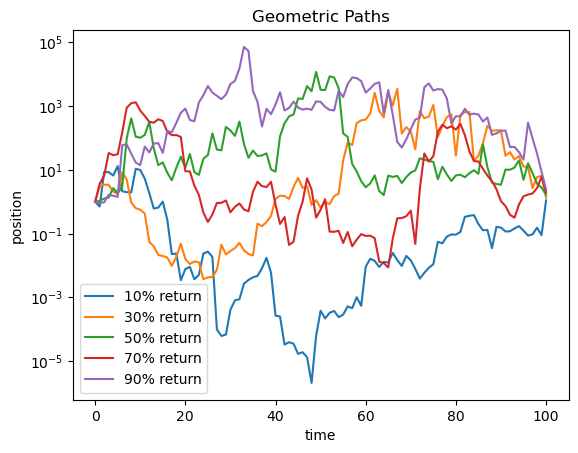

In [10]:
plt.plot(ten_percent[0], label='10% return')
plt.plot(thirty_percent[0], label='30% return')
plt.plot(fifty_percent[0], label='50% return')
plt.plot(seventy_percent[0], label='70% return')
plt.plot(ninety_percent[0], label='90% return')
plt.legend()
plt.xlabel('time')
plt.ylabel('position')
plt.title('Geometric Paths')
plt.yscale('log')

# Question 2

## Simulate T = 12 steps of the simple random walk from Theory 2. Compute the empirical probabilities from parts A and B, and compare with theoretical results.


### Part A

In [11]:
T = 12
N = 1000
p=0.6
q=0.4
Sn = []
Mn = []
np.random.seed(1)
for i in range(0,N):
    Z= np.random.choice(a=[-1,1],p=[q,p],size=T+1)
    Z[0]= -1 #S_0 - start position
    Sn.append(np.cumsum(Z))

In [12]:
count = 0
for i in range(N):
    if Sn[i][-1] == 5:
        count+=1

In [13]:
theoretical_prob= 0.1418939597
print('P(S_12=5|S_1=-1)=', count/N)
print('Percent difference between theory and emperical:', (((count/N)-theoretical_prob)/theoretical_prob))

P(S_12=5|S_1=-1)= 0.143
Percent difference between theory and emperical: 0.0077948370905882875


### Part B

In [14]:
T = 8
N = 1000
p=0.6
q=0.4
Sn = []
Mn = []
np.random.seed(1)
for i in range(0,N):
    Z= np.random.choice(a=[-1,1],p=[q,p],size=T+1)
    Z[0]= 3 #S_0 - start position
    Sn.append(np.cumsum(Z))

In [15]:
count = 0
for i in range(N):
    if Sn[i][-1] == 5:
        count+=1

In [16]:
theoretical_prob= 0.27869184
print('P(S_12=5|S_4=3)',count/N)
print('Percent difference between theory and emperical:', (((count/N)-theoretical_prob)/theoretical_prob))

P(S_12=5|S_4=3) 0.281
Percent difference between theory and emperical: 0.008282122648442105
